In [1]:
%matplotlib inline

from sklearn import datasets, model_selection
import copy
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
from pennylane import numpy as np
from concrete_VQC_model import *


In [2]:
def quantum_nn(data, weights):
    vqc = concrete_VQC(data, weights)
    return (1-vqc())/2 # probability of measure 1


def calc_loss(prediction, target):
    return (prediction-target)**2


def gradient(X_i, Y_i, theta):
    delta = 0.01
    grad = []
    dtheta = copy.copy(theta)
    for i in range(len(theta)):
        dtheta[i] += delta

        predict1 = quantum_nn(X_i,dtheta)
        predict2 = quantum_nn(X_i,theta)

        # Finite difference
        grad.append( (calc_loss(predict1,Y_i) - calc_loss(predict2,Y_i)) / delta )
    return np.array(grad)


def accuracy(X,Y,theta):
    counter = 0
    for X_i,Y_i in zip(X,Y):
        prediction = quantum_nn(X_i,theta)

        if prediction < 0.5 and Y_i == 0:
            counter += 1
        elif prediction >= 0.5 and Y_i == 1:
            counter += 1
    return (counter/len(Y))

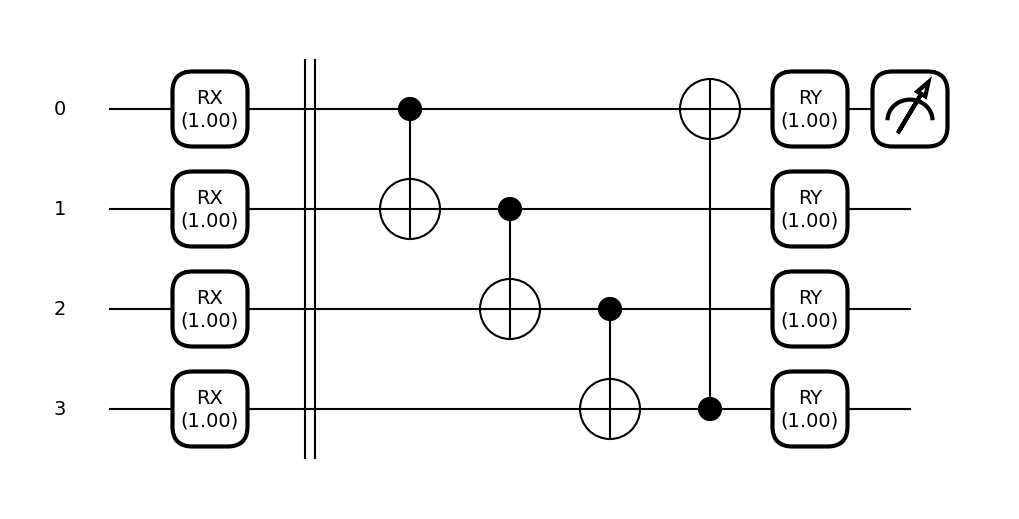

In [3]:
vqc = concrete_VQC(data=np.ones(4), weights=np.ones(4))
qml.draw_mpl(vqc.circuit,decimals=2)()
plt.savefig("QCL_iris.pdf", format='pdf')
plt.show()


X min: 0.1
X max: 7.0
Epoch 	 Loss 	 Accuracy
0 	 0.314 	 0.149
1 	 0.313 	 0.149
2 	 0.312 	 0.149
3 	 0.311 	 0.149
4 	 0.308 	 0.149
5 	 0.304 	 0.149
6 	 0.298 	 0.149
7 	 0.291 	 0.149
8 	 0.281 	 0.149
9 	 0.270 	 0.149
10 	 0.258 	 0.149
11 	 0.247 	 0.851
12 	 0.237 	 0.851
13 	 0.229 	 0.851
14 	 0.223 	 0.851
15 	 0.217 	 0.851
16 	 0.214 	 0.851
17 	 0.211 	 0.851
18 	 0.208 	 0.851
19 	 0.207 	 0.851
Accuracy is:  0.7575757575757576
Weights are:  [8.94374461 4.36880511 3.93802394 2.75001834]


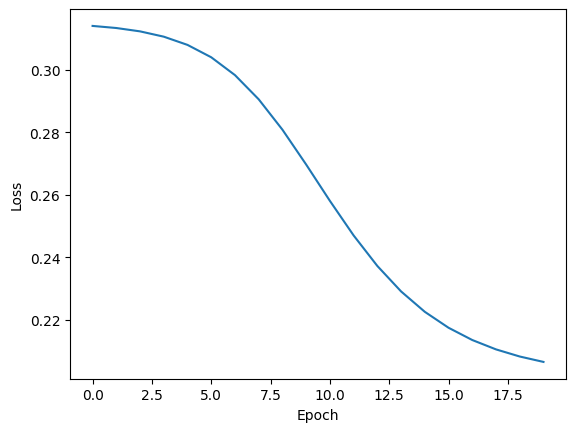

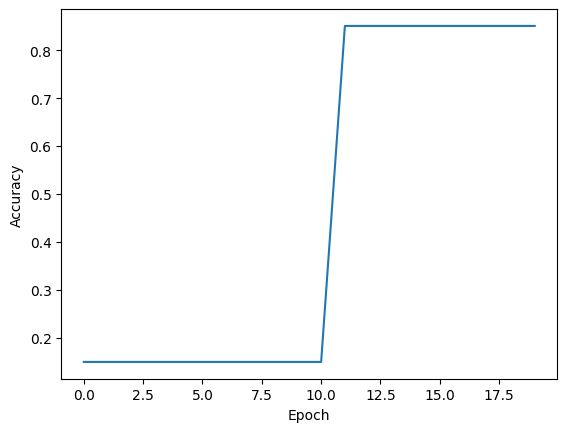

In [7]:
iris = datasets.load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.33,random_state=42)

# print ranges of X
print(f"X min: {np.min(X)}")
print(f"X max: {np.max(X)}")

N = 4

epochs = 30
eta = 0.1
loss_list = []
acc_list = []


np.random.seed(2916)
thetas = [np.random.uniform(0, 2**np.pi, N) for _ in range(3)]# For reproducibility
for i in range(3):
    theta = thetas[i]

    print(f'Epoch \t Loss \t Accuracy')
    for epoch in range(epochs):
        loss_tmp = []
        for X_i, Y_i in zip(X_train, Y_train):
            prediction = quantum_nn(X_i, theta)
            loss_tmp.append(calc_loss(prediction, Y_i))
    
            # Update theta by using SGD
            theta = theta - eta * gradient(X_i, Y_i, theta)
        loss_list.append(np.mean(loss_tmp))
        acc = accuracy(X_train, Y_train, theta)
        acc_list.append(acc)
    
        print(f'{epoch} \t {loss_list[-1]:.3f} \t {acc:.3f}')

plt.figure()
plt.plot(acc_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


print("Accuracy is: ", accuracy(X_test,Y_test,theta))
print("Weights are: ", theta)
# print(vqc)

In [5]:
print("Saving weights")
# np.savetxt('weights.txt', theta)
# print("Weights saved to 'weights.txt'")
# # Save the weights to a file
np.save('weights.npy', theta)
print("Weights saved to 'weights.npy'")
    

Saving weights
Weights saved to 'weights.npy'


In [6]:
# read the weights from the file
weights = np.load('weights.npy')
print("Weights loaded from 'weights.npy':", weights)

Weights loaded from 'weights.npy': [3.10206945 8.08175764 8.04770038 3.35317973]
